Note to self: Using Pything 3.11.7 Kernel in the notebook, as apposed to 3.9.13 in previous.
Also, have a look at Matplotlib Quick Start Guide in the docs.

# Anatomy of a Matplotlib Figure
# ![Anatomy of a Matplotlib Figure](../anatomy_of_matplotlib.webp){width=50%}

## Bar Plot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from datetime import datetime

# Set the colour palette to colour-blind friendly
sns.reset_orig()
my_palette = sns.color_palette()
plt.style.use("seaborn-v0_8-colorblind")

gdp = pd.read_csv("gdp.csv")

# get the GDP per capita data for each country
# reset_index so that each Series has indexes 0,1,2,3...
gdp_uk = gdp[gdp['country']=='UK'].reset_index()
gdp_fr = gdp[gdp['country']=='FR'].reset_index()
gdp_it = gdp[gdp['country']=='IT'].reset_index()
gdp_de = gdp[gdp['country']=='DE'].reset_index()

gdp_wide = pd.read_csv("gdp_wide.csv")
# set the row labels as countries
gdp_wide.set_index('country', inplace= True)
# set the column labels (years) with the type int
gdp_wide.columns = gdp_wide.columns.astype(int)

wine = pd.read_csv("wine.csv")


Here we continue to plot the GDP per capital data, but now we are plotting against different countries rather than time. We can plot the bars vertically or horizontally:

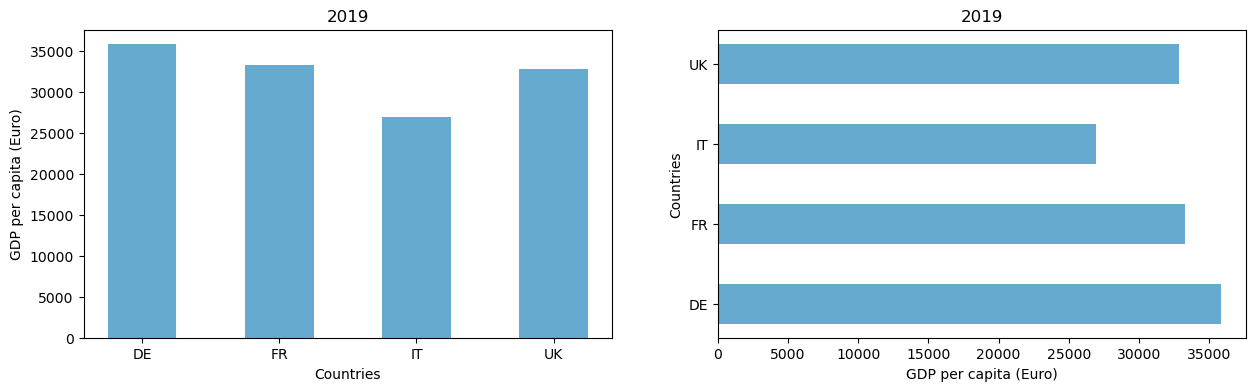

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))   # Think of fig as the canvas and ax as the things inside of it.

# ======== vertical bars ========
# ax = ax[0] indicates its the first subplot

ax[0].bar(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6, # the argument alpha =0.6 makes the bars slightly transparent
width = 0.5) # the argument width = 0.5 makes the bars thinner

ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")

# ======== horizontal bars ========
# ax = ax[1] indicates its the second subplot
ax[1].barh(gdp_wide[2019].index, gdp_wide[2019], alpha = 0.6,
height = 0.5) # note here we use "height" to make the bars thinner
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")

plt.show()

## Bar Plot With pandas

Like the line plots, we can plot bar plot using **DataFrame plot()** instead. Note the plot() arguments are different.

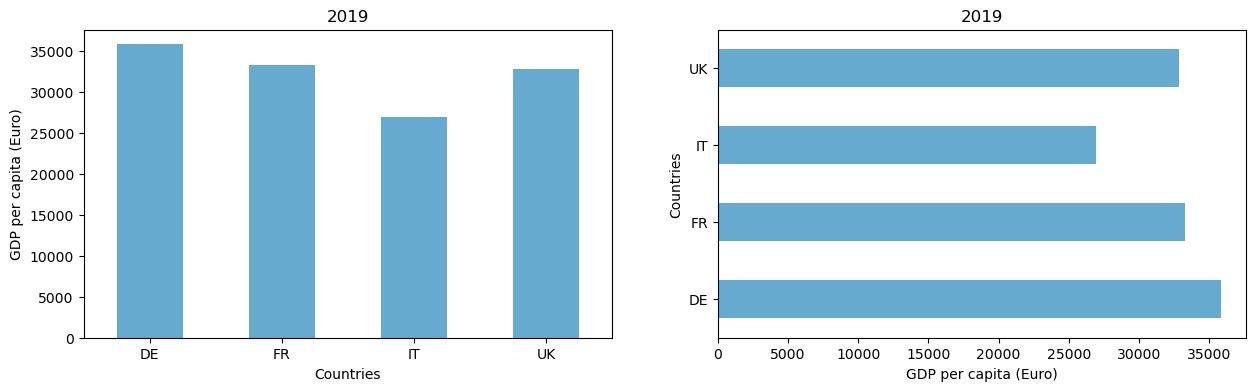

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# ======== vertical bars ========
gdp_wide[2019].plot.bar(x = 'country', y = 'value', rot = 0, # rot = 0: what if you omit it?
    ax = ax[0], # note we need to give ax as an argument
    legend = False, alpha = 0.6) # legend = False: not to show legend
ax[0].set_ylabel('GDP per capita (Euro)')
ax[0].set_xlabel('Countries')
ax[0].title.set_text("2019")

# ======== horizontal bars ========
gdp_wide[2019].plot.barh(x='country', y='value', ax = ax[1], legend = False, alpha= 0.6)
ax[1].set_xlabel('GDP per capita (Euro)')
ax[1].set_ylabel('Countries')
ax[1].title.set_text("2019")

## Side By Side barplots

We can have side by side bars by provide using DataFrame plot() function. You could use **matplotlib plot()** but it is **easier with DataFrame plot()**. Here we plot the GDP per capital from
year 2009 and 2019 side by side:

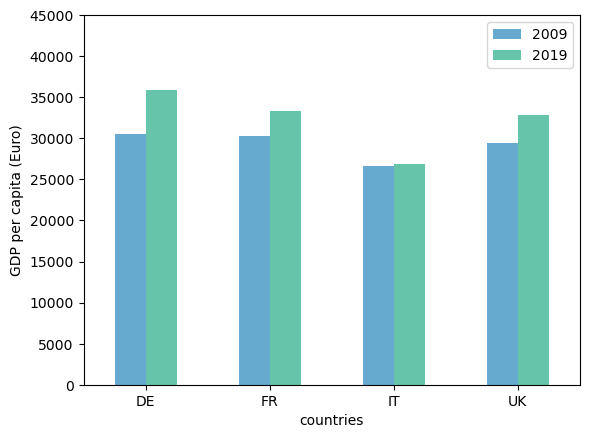

In [12]:
ax = gdp_wide[[2009,2019]].plot.bar(rot=0, alpha = 0.6)

ax.set_ylim(top = 45000) # make ylim max to be larger so that the legend and the bars are not overlapping
ax.set_ylabel('GDP per capita (Euro)')
ax.set_xlabel('countries')

plt.show()

Note here **we did not call fig, ax = plt.subplots()** and then pass ax into Dataframe
plot(). Instead we use the ax created from Dataframe plot(). We could of course use fig,
ax = plt.subplots() and then pass ax into Dataframe plot() (as shown below), but we do
not have to.

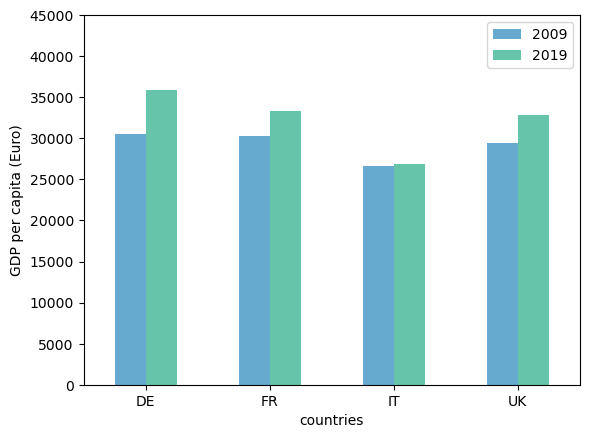

In [17]:
fig, ax = plt.subplots()

gdp_wide[[2009,2019]].plot.bar(rot=0, alpha = 0.6, ax = ax)

ax.set_ylim(top = 45000) # make ylim max to be larger so that the legend and the bars are not overlapping
ax.set_ylabel('GDP per capita (Euro)')
ax.set_xlabel('countries')

plt.show()

## Histogram: Showing the Distribution of a Variable

Below we create a **histogram via plt** to show the frequency of observations (here are the wines) that fall into a given ash level interval. 
You can use ax instead if you want to (although the syntax for setting labels and title is not the same).

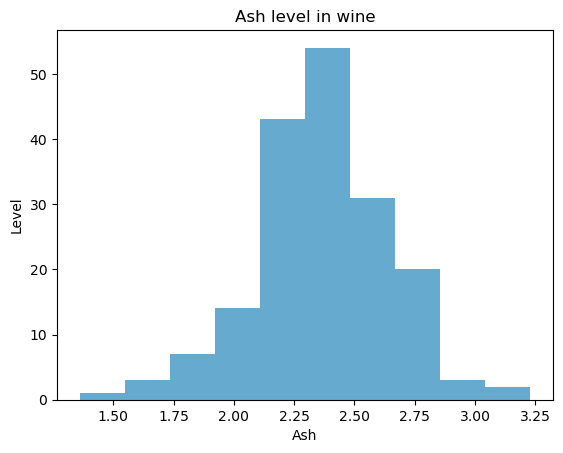

In [18]:
fig, ax = plt.subplots()

plt.hist(wine['ash'], 10, alpha = 0.6)
plt.xlabel('Ash')
plt.ylabel('Level')
plt.title("Ash level in wine")

plt.show()

In order for the histogram to represent distribution (i.e. the area of the histogram is 1), add the argument `density = 1`:

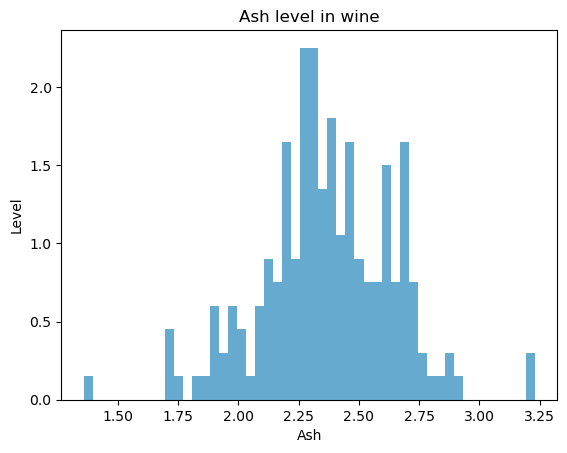

In [21]:
fig, ax = plt.subplots()

plt.hist(wine['ash'], 50, density = 1, alpha = 0.6)
plt.xlabel('Ash')
plt.ylabel('Level')
plt.title("Ash level in wine")

plt.show()

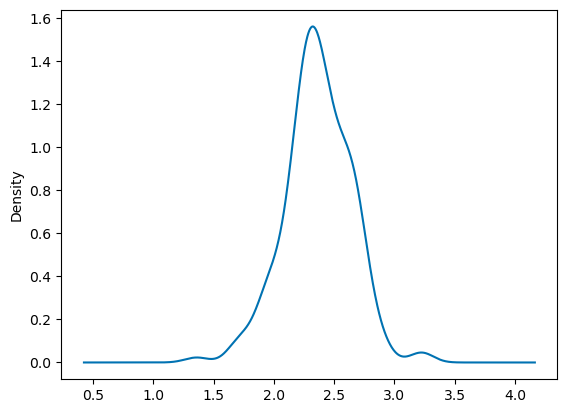

In [27]:
# type(wine['ash'])
wine['ash'].plot(kind = 'density')
plt.show()

## Boxplot and variations: Showing the distribution of a variable

In Python boxplot (and its variations) can be created via matplotlib or seaborn. We will use the boxplots to compare the chemistry composition of wines with different class labels.
We start at looking at the **colour intensity** regardless the class label:

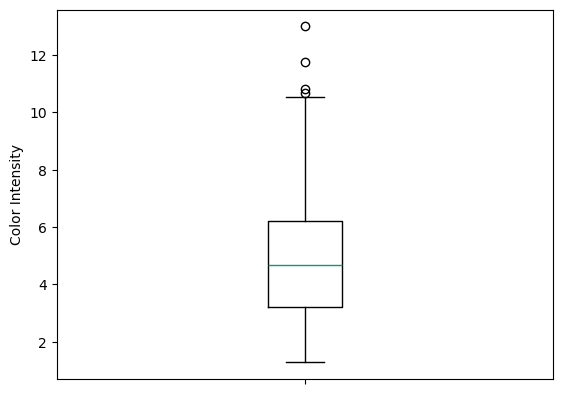

In [29]:
fig, ax = plt.subplots()

ax.boxplot(wine['color_intensity'])
ax.set_ylabel('Color Intensity')
ax.set_xticklabels([''])

plt.show()

## Side By Side (or grouped) Boxplot

Often, it is more useful to have boxplots side by side to compare the same variables conditional
on some factors. For example, here we want to see the colour intensity of wines given the type of
the wine. With matplotlib, we need to first convert our long `wine['color_intensity']` data to
wide, and then create the boxplot:

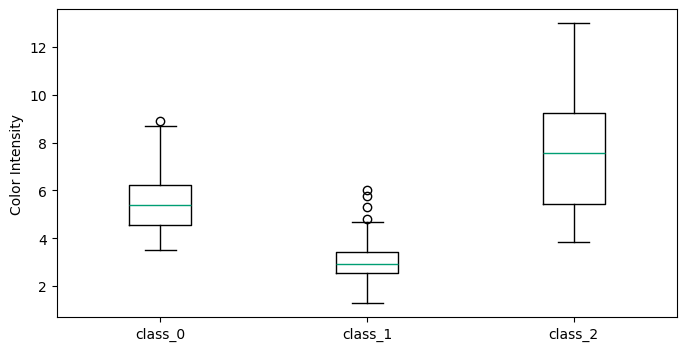

In [31]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.boxplot([wine['color_intensity'][wine['target']=='class_0'],
    wine['color_intensity'][wine['target']=='class_1'],
    wine['color_intensity'][wine['target']=='class_2']])
ax.set_ylabel('Color Intensity')
ax.set_xticklabels(['class_0', 'class_1', 'class_2'])

plt.show()

Side by side boxplot can be created more easily via seaborn. With seaborn, we can use the original wine DataFrame ('target' column in the wine DataFrame contains the class label information):

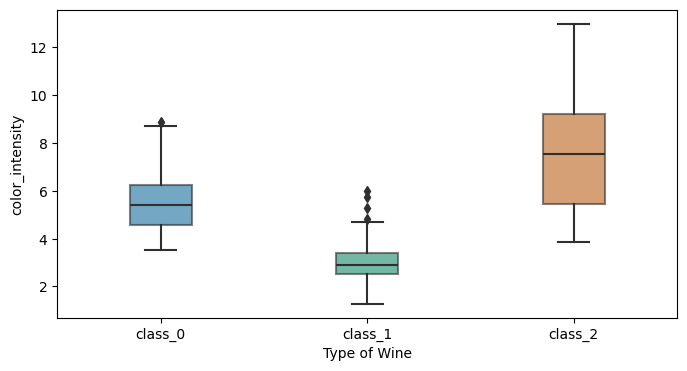

In [38]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = wine, x = 'target', y = 'color_intensity', width = 0.3,
     boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_xlabel("Type of Wine")

plt.show()

## Boxplot Variation

To create a notched boxplot, add the argument `notch = True`:

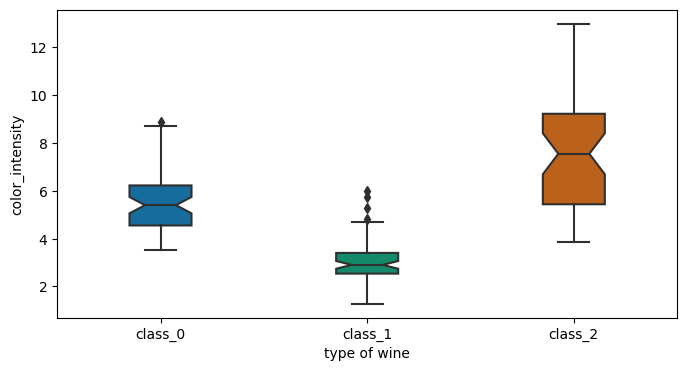

In [39]:
plt.subplots(figsize=(8, 4))

ax = sns.boxplot(data = wine, x = 'target', y = 'color_intensity', notch = True, width = 0.3)

ax.set_xlabel("type of wine")

plt.show()

To create a violin plot, we use the `violinplot()`. Below boxplot is plotted as well to show you
how you can have subplots with seaborn:

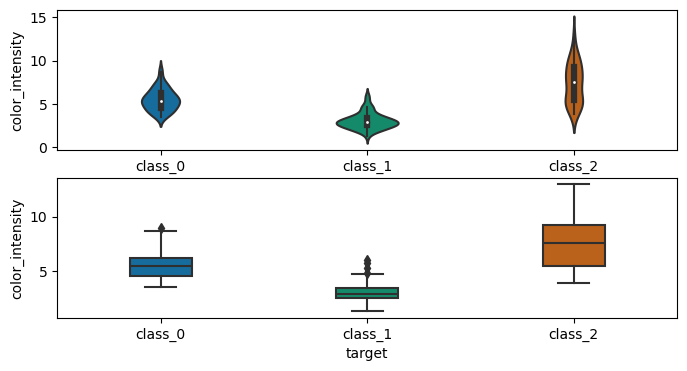

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
sns.violinplot(data = wine, x = 'target', y = 'color_intensity', ax = ax[0], width= 0.3)
sns.boxplot(data = wine, x = 'target', y = 'color_intensity', ax = ax[1], width = 0.3)
ax[0].set_xlabel("type of wine")
plt.show()

## Scatter: Showing Relations Between Two Variables

Below we create a scatter plot via `DataFrame plot()` to show how the two chemistry
composition levels relate to each other (you can use matplotlib instead if you want to).

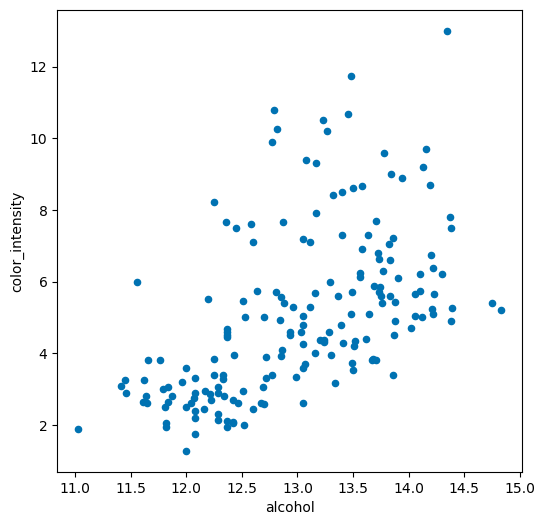

In [41]:
ax = wine.plot.scatter('alcohol', 'color_intensity', figsize=(6, 6)) # use a square plot size

plt.show()

## Scatter Plot With seaborn

With seaborn, we can use `relplot()` to plot the scattered plot. We can set the optional
argument `hue, style, size`, etc to show an extra dimension of the data.
For example, here we plot the `color_intensity` against `alcohol`, with the colour of scattered
points depends on which group the wines belong to by providing the optional argument hue:

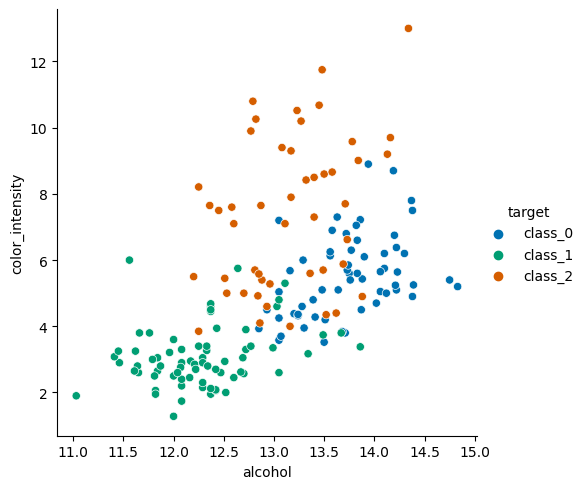

In [42]:
sns.relplot(x = 'alcohol', y = 'color_intensity', hue = "target", data = wine)
plt.show()

We can also use the shape instead of colour to represent the group membership by `style`:

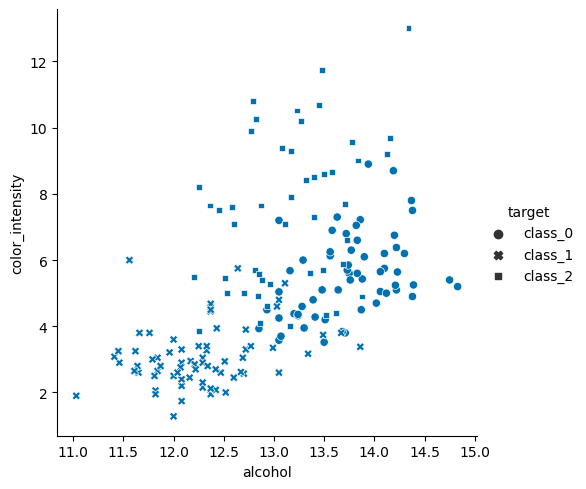

In [43]:
sns.relplot(x = 'alcohol', y = 'color_intensity', style="target", data = wine)
plt.show()

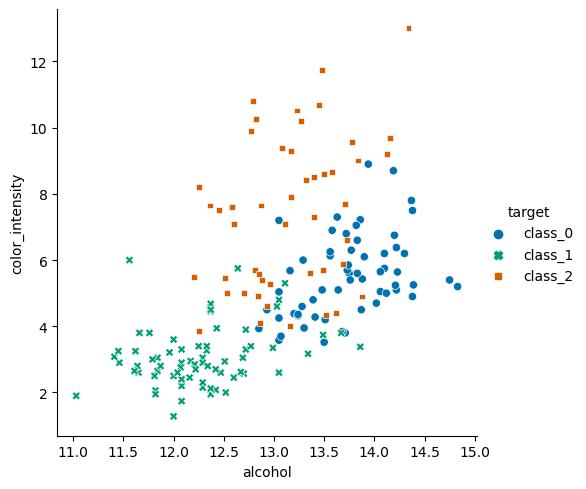

In [46]:
sns.relplot(x = 'alcohol', y = 'color_intensity', style="target", data = wine, hue = 'target')
plt.show()

The optional argument `hue` can also be used for continuous variable. Here the colour of the
points depends on the value of `ash`

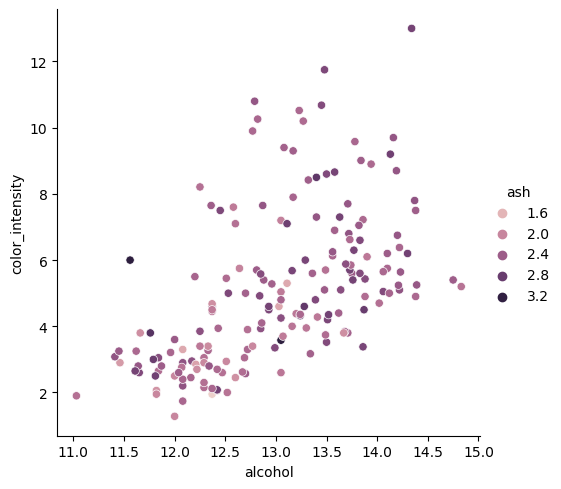

In [47]:
sns.relplot(x = 'alcohol', y = 'color_intensity', hue = "ash", data = wine)
plt.show()

We can also have a graph showing four different variables by using both `hue` and `style`:

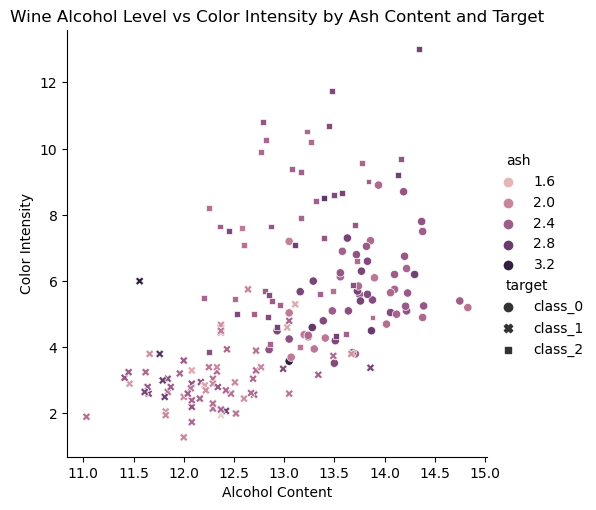

In [53]:
sns.relplot(x = 'alcohol', y = 'color_intensity', hue = "ash", style = 'target', data = wine)
plt.title('Wine Alcohol Level vs Color Intensity by Ash Content and Target')
plt.xlabel('Alcohol Content')
plt.ylabel('Color Intensity')

plt.show()

## More on Scatterplots With seaborn

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


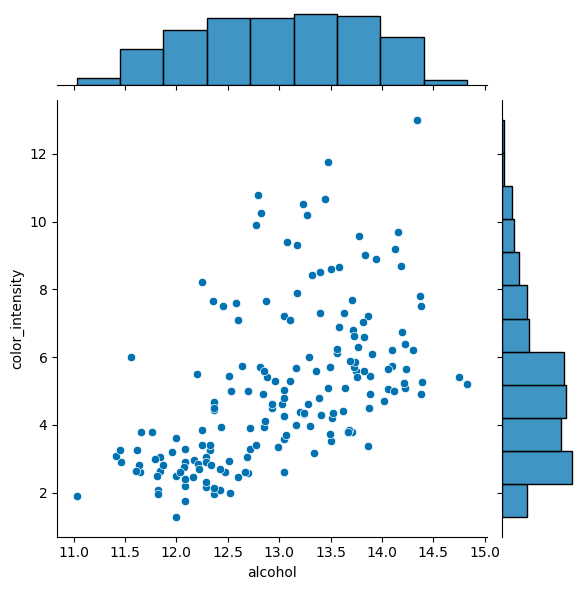

In [49]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine)
plt.show()

We can also add a linear regression fit and univariate KDE curves using `kind='reg'`:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


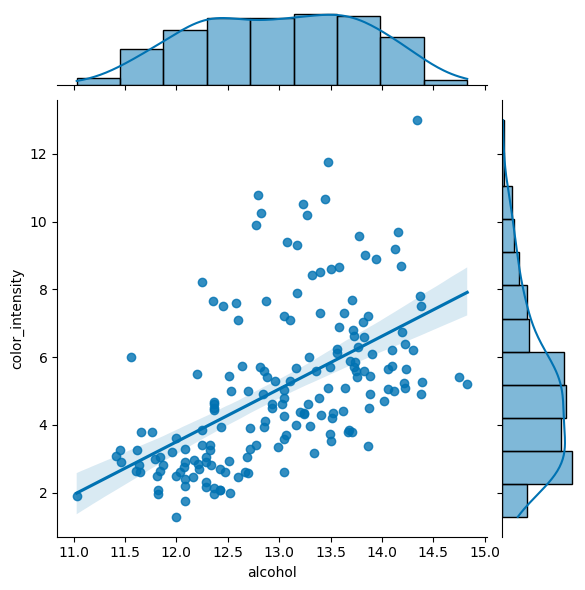

In [54]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, kind="reg")
plt.show()

… or with the bivariate and univariate Kernel density estimation:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

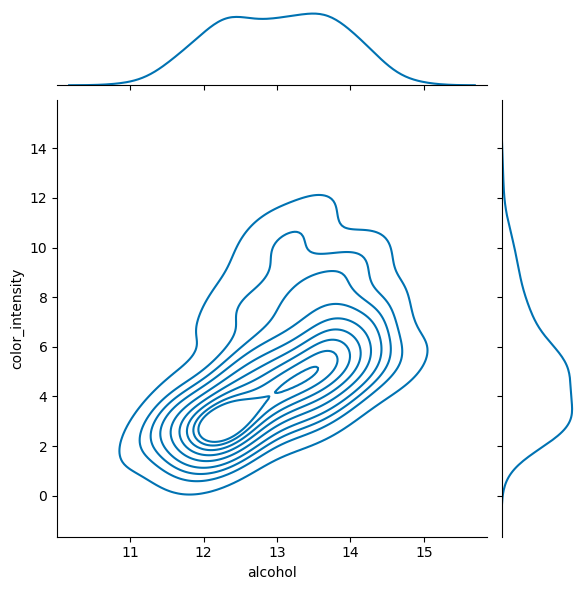

In [55]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, kind = 'kde')
plt.show()

You can have show the scatter points in different colours according to the label as well:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

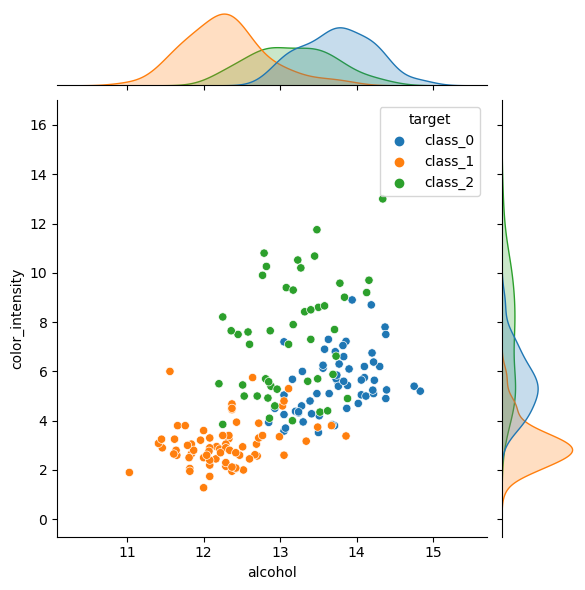

In [56]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, hue = "target", palette = my_palette[:3])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

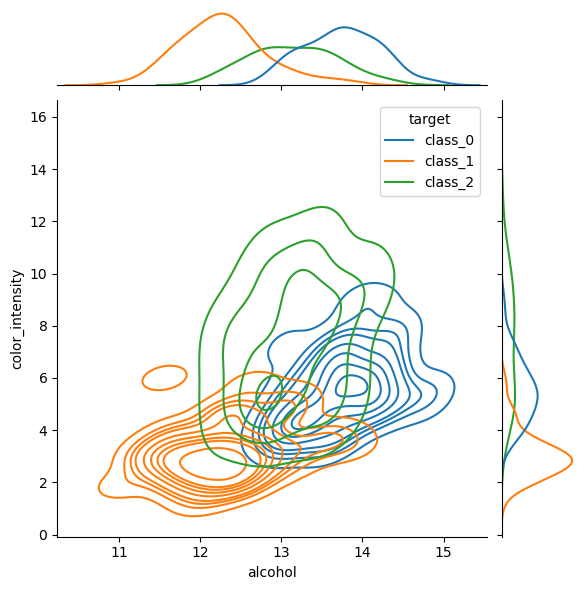

In [57]:
sns.jointplot(x = 'alcohol', y = 'color_intensity', data = wine, kind = 'kde', hue= "target", palette = my_palette[:3])
plt.show()

See here to see what other scatter plot you can create with seaborn.
https://seaborn.pydata.org/generated/seaborn.jointplot.html

## Heat Map

To create a heatmap, we can use `sns.heatmap()`. Here we create a heatmap to show the
correlation of the wine chemistry composition:

In [58]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [126]:
wine.drop('target',axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


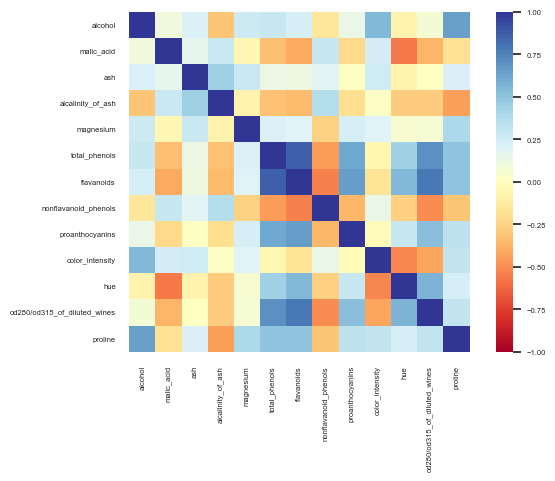

In [60]:
sns.set(font_scale=0.5)

ax = sns.heatmap(wine.drop('target',axis=1).corr(),
                 center= 0, vmin = -1, vmax = 1, cmap= "RdYlBu", # this set the colour of the heatmap
                 square=True) # set the heatmap to be square shape

ax.figure.tight_layout() # this makes sure all labels are shown in the plot

plt.show()

The argument `cmap= "RdYlBu"` sets the palette, with red corresponds to lowest value, yellow
corresponds to the middle value and blue corresponds to the highest value. center = 0 sets 0
as the middle value, and `vmax = 1` and `vmax = -1` set the maximum and minimum values to be
1 and -1. To set heatmap with different colours, see here.

## Exporting Plots

Similar to R, you can save the figure as a separate file. In Python, you can do it by using the
function `savefig()`:

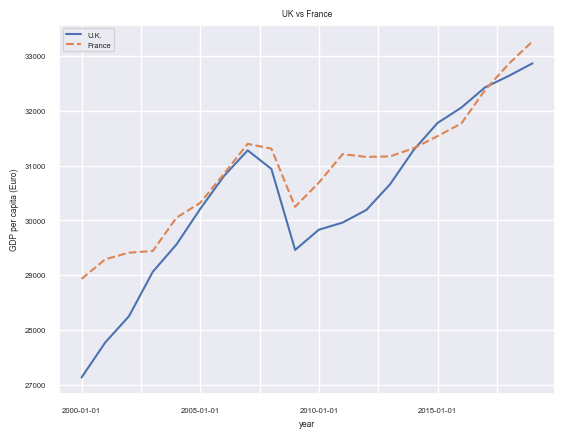

In [61]:
fig, ax = plt.subplots()

gdp_uk.plot(x = 'year', y = 'value', ax = ax)
gdp_fr.plot(x = 'year', y = 'value', style = '--', ax = ax)
ax.legend(["U.K.", "France"])

ax.set_xlabel('year')
ax.set_ylabel('Euro')
ax.set_ylabel('GDP per capita (Euro)')
ax.title.set_text("UK vs France")

plt.savefig('gdp_uk_france.png') # you can find the file in the folder where you run this line of code